In [37]:
import pandas as pd
import numpy as np

# Load data
df = pd.read_csv("test.csv")

# Reshape x and y to be 2D arrays
x = df['x'].values.reshape(-1, 1)
y = df['y'].values.reshape(-1, 1)

# Step 1: Shuffle the data
np.random.seed(42)  # for reproducibility
indices = np.arange(x.shape[0])
np.random.shuffle(indices)

x = x[indices]
y = y[indices]

# Step 2: 80/20 split
split_index = int(0.8 * x.shape[0])
x_train, x_test = x[:split_index], x[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Step 3: Z-score normalization (standardization)
mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)

x_train_scaled = (x_train - mean) / std
x_test_scaled = (x_test - mean) / std # use train mean & std!

# Step 4: Initialize parameters
m, n = x_train_scaled.shape
w = np.random.uniform(low=-1.0, high=1.0, size=(n, 1))
b = 0.0


**# Linear Regression model from Scratch**

In [38]:
#Functions

def compute_cost(x, y, w, b):
    m,n = x.shape

    f_wb = np.dot(x,w) + b
    cost = (1/(2 *m)) * np.sum((f_wb - y)**2)
    return cost
    
def compute_gradient(x, y, w, b):
    m = x.shape[0]

    f_wb = np.dot(x, w) + b          # shape (m, 1)
    error = f_wb - y                 # shape (m, 1)

    dj_dw = (1/m) * np.dot(x.T, error)  # shape (n, 1)
    dj_db = (1/m) * np.sum(error)       # scalar

    return dj_dw, dj_db

def gradient_descent(lr, x, y, w, b, previous_cost, threshold, max_iters=1000000):
    m = x.shape[0]
    iters = 0

    while True:
        
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        
        w = w - lr * dj_dw
        b = b - lr * dj_db

        current_cost = compute_cost(x, y, w, b)

        if iters % 100 == 0:
            print(f"Iteration {iters} | Cost: {current_cost:.5f} | w: {w.ravel()} | b: {b:.5f}")
            
        if abs(current_cost-previous_cost) < threshold:
            print(f"Converged in {iters} iterations.")
            break

        previous_cost = current_cost
        iters += 1
        if iters >= max_iters:
            print("Stopped: Max iterations reached.")
            break


    return w , b 

def predict(x_test_scaled, w, b):
    return np.dot(x_test_scaled,w) + b
    

In [39]:
wf , bf = gradient_descent(0.002,x_train_scaled,y_train,w,b,previous_cost=float('inf'),threshold=1e-10)



Iteration 0 | Cost: 1748.89793 | w: [0.3192878] | b: 0.10373
Iteration 100 | Cost: 1173.37183 | w: [5.48074758] | b: 9.49503
Iteration 200 | Cost: 787.73964 | w: [9.70574721] | b: 17.18244
Iteration 300 | Cost: 529.34617 | w: [13.16419166] | b: 23.47509
Iteration 400 | Cost: 356.20920 | w: [15.99515948] | b: 28.62605
Iteration 500 | Cost: 240.19850 | w: [18.31249576] | b: 32.84246
Iteration 600 | Cost: 162.46534 | w: [20.20939032] | b: 36.29386
Iteration 700 | Cost: 110.38011 | w: [21.76212524] | b: 39.11907
Iteration 800 | Cost: 75.48032 | w: [23.0331425] | b: 41.43169
Iteration 900 | Cost: 52.09566 | w: [24.07355503] | b: 43.32473
Iteration 1000 | Cost: 36.42673 | w: [24.9252022] | b: 44.87431
Iteration 1100 | Cost: 25.92774 | w: [25.6223323] | b: 46.14274
Iteration 1200 | Cost: 18.89287 | w: [26.19297986] | b: 47.18103
Iteration 1300 | Cost: 14.17915 | w: [26.660093] | b: 48.03095
Iteration 1400 | Cost: 11.02071 | w: [27.04245632] | b: 48.72666
Iteration 1500 | Cost: 8.90440 | w: [2

Testing the model

In [40]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Predict on test set
#y_pred_test = predict(x_test_scaled, wf, bf)
y_pred_test = predict(x_test_scaled, wf, bf)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred_test)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)

# Print results
print(f"\n📊 Test Metrics (from sklearn):")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"R² Score: {r2:.4f}")



📊 Test Metrics (from sklearn):
Mean Squared Error (MSE): 9.0316
Mean Absolute Error (MAE): 2.2963
R² Score: 0.9894


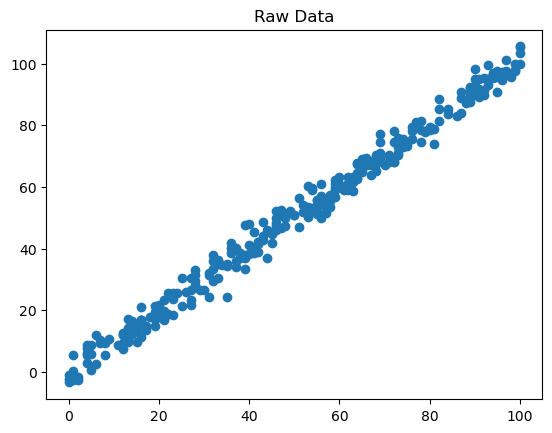

In [41]:
import matplotlib.pyplot as plt

plt.scatter(x, y)
plt.title("Raw Data")
plt.show()

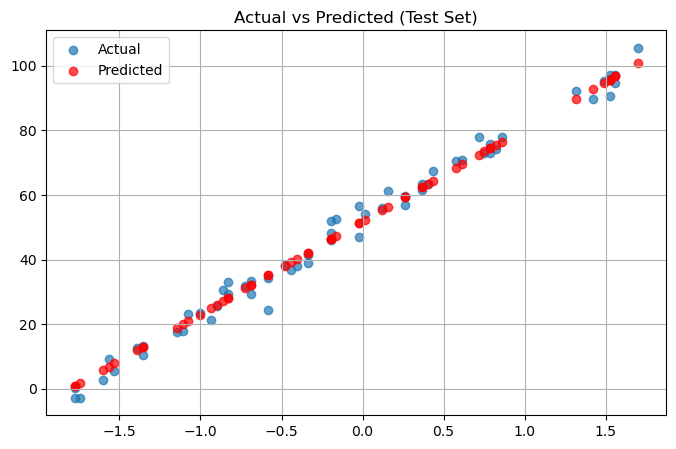

In [42]:
y_pred_test = predict(x_test_scaled, wf, bf)

plt.figure(figsize=(8,5))
plt.scatter(x_test_scaled, y_test, label="Actual", alpha=0.7)
plt.scatter(x_test_scaled, y_pred_test, label="Predicted", alpha=0.7, color='red')
plt.title("Actual vs Predicted (Test Set)")
plt.legend()
plt.grid(True)
plt.show()


In [43]:
print("Final weight (w):", wf)
print("Final bias (b):", bf)

Final weight (w): [[28.76744618]]
Final bias (b): 51.86528553698503


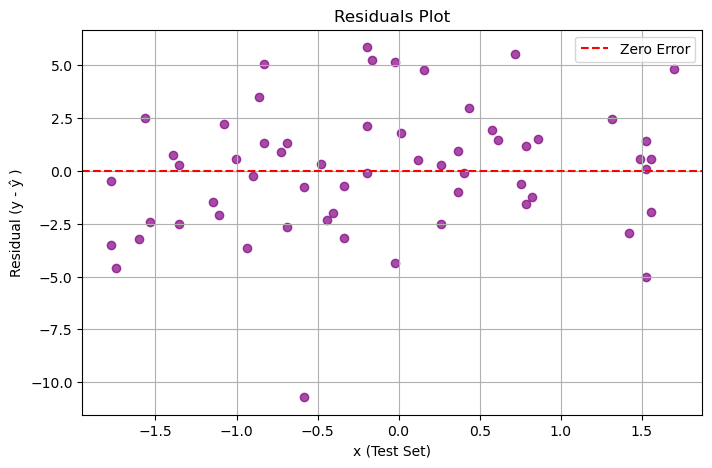

In [44]:
# Residuals = actual - predicted
residuals = y_test - y_pred_test

plt.figure(figsize=(8, 5))
plt.scatter(x_test_scaled, residuals, color='purple', alpha=0.7)
plt.axhline(0, color='red', linestyle='--', label='Zero Error')
plt.title("Residuals Plot")
plt.xlabel("x (Test Set)")
plt.ylabel("Residual (y - ŷ )")
plt.grid(True)
plt.legend()
plt.show()